## Preliminaries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import __init__ as a
a.mpl.rcParams['font.size'] = 12

In [3]:
if a.HAS_OBABEL:
    a.test_eden_pybel() # Should show two molecules below.  

In [4]:
a.test_rdkit_mordred() # Should show features for two molecules below.  

Convering SMILES string to Mol format...
Computing 3D coordinates...
Computing Mordred features...


100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


There are 2 molecules and 1824 features


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
OC[C@@H](O1)[C@@H](O)[C@H](O)[C@@H]2[C@@H]1c3c(O)c(OC)c(O)cc3C(=O)O2,17.8202,15.152,0,0,29.22,2.56069,5.12137,29.22,1.27043,4.077,...,10.4037,58.1999,328.079,8.41229,1030,47,126,157,9.47222,5.11111
CC(=O)NCCC1=CNc2c1cc(OC)cc2,12.8658,11.2443,0,0,21.6032,2.42108,4.72099,21.6032,1.27077,3.74904,...,9.53727,63.2639,232.121,7.03398,561,22,84,96,5.80556,3.88889


In [5]:
plus_carvone = 'CC1=CC[C@@H](CC1=O)C(=C)C'
minus_carvone = 'CC1=CC[C@H](CC1=O)C(=C)C'
features = a.smiles_to_mordred([plus_carvone,minus_carvone])
plus_features = features.values[0,:]
minus_features = features.values[1,:]
print("%.1f percent of Mordred features are identical between (+)-carvone and (-)-carvone." % \
      (100.0*(plus_features==minus_features).mean()))

Convering SMILES string to Mol format...
Computing 3D coordinates...
Computing Mordred features...


100%|██████████| 2/2 [00:00<00:00,  7.92it/s]

There are 2 molecules and 1824 features
73.9 percent of Mordred features are identical between (+)-carvone and (-)-carvone.


## Load data from the DREAM challenge

In [6]:
dream_CIDs = a.loading.get_CIDs(['training','leaderboard','testset']) # Load the DREAM CIDs
dream_CID_dilutions = a.loading.get_CID_dilutions(['training','leaderboard','testset'])

In [7]:
dream_smiles = a.get_dream_smiles(dream_CIDs) # Load the DREAM SMILES strings

In [8]:
isomeric_CIDs = a.find_isomers(dream_CIDs,dream_smiles)

In [9]:
if a.HAS_OBABEL:
    a.show_isomers(isomeric_CIDs,dream_CIDs,dream_smiles) # Show the isomeric pairs from the DREAM challenge

In [10]:
# Load DREAM perceptual data
dream_perceptual_data = a.loading.load_perceptual_data(['training','leaderboard','testset'])
Y_dream = a.dream.make_Y(dream_perceptual_data)
# We must also have an imputed version that we can use as input to the algorithm since it will not work with NaNs.  
Y_dream_imputed = a.dream.make_Y(dream_perceptual_data, imputer='median')

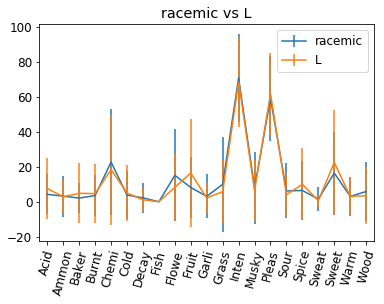

In [11]:
isomeric_index = 0 # The first isomeric pair, which should be racemic vs L-something
a.plot_isomer_ratings(dream_perceptual_data,isomeric_CIDs[isomeric_index],('racemic','L'))

In [12]:
shadmany_smiles = a.load_other_smiles(shadmany=True)
shadmany_data = a.load_data('shadmany')

Loading molecules from the Shadmany enantiomer collection...
Loaded 32 molecules


In [13]:
shadmany_data

,Molecule Name,Pubchem ID #,Detection Threshold,Detection Units,Normalized Detection Threshold,Molecule Odour
C=C(C)[C@@H]1CC=C(C)C(=O)C1,(4S)-(+)-carvone,16724,1.30E+02,ppb,1.300000e+02,"caraway, fresh herbal"
C=C(C)[C@H]1CC=C(C)C(=O)C1,(4R)-(-)-carvone,439570,2.00E+00,ppb,2.000000e+00,"sweet spearmint, fresh herbal"
C=C(C)[C@@H]1CCC2=CC(=O)C[C@@H](C)[C@]2(C)C1,"(4R,4aS,6R)-(+) nootkatone",1268142,1.50E+01,ppm,1.500000e+04,grapefruit odor
C=C(C)[C@H]1CCC2=CC(=O)C[C@H](C)[C@@]2(C)C1,"(4S,4aR,6S)-(-) nootkatone",7567181,6.60E+04,ppm,6.600000e+07,woody and spicy
C=C1CCCC(C)(C)[C@@H]1/C=C/C(C)=O,(S)-(+)-gamma-ionone,11194862,7.00E-02,ppb water,7.000000e-02,"Linear, very pleasant, floral, green, woody od..."
C=C1CCCC(C)(C)[C@H]1/C=C/C(C)=O,(R)-(-)-gamma-ionone,11389922,1.10E+01,ppb water,1.100000e+01,"Weak green, fruity, pineapple-like odor with m..."
C=C[C@@H](O)CCCCC,(S)-(+)-1-octen-3-ol,2724898,1.00E+02,ppb in aqueous ethanol,1.000000e+02,"moldy, grassy, artificial; also desribed as he..."
C=C[C@H](O)CCCCC,(R)-(-)-1-octen-3-ol,6992244,1.00E+01,ppb in aqueous ethanol,1.000000e+01,"fruity, genuine mushroom-like; also desribed a..."
C=C[C@@]1(C)CC[C@H]([C@@H](C)C=O)O1,"(2R,2\'R,5\'R)-Lilac aldehyde",71587756,2.20E+01,ng,2.200000e-02,flowery
C=C[C@]1(C)CC[C@@H]([C@H](C)C=O)O1,"(2S,2\'S,5\'S)-Lilac aldehyde",441572,2.00E-01,ng,2.000000e-04,"fresh, flowery"


## Compute DREAM molecule features and place into a data frame

In [14]:
# Compute Morgan features for DREAM molecules
all_smiles = list(set(dream_smiles + shadmany_smiles))
morgan_sim_all = a.smiles_to_morgan_sim(all_smiles,all_smiles)

507 similarity features for 507 molecules


In [15]:
# Compute NSPDK features for DREAM molecules
if a.HAS_OBABEL:
    nspdk_all = a.smiles_to_nspdk(all_smiles)
else:
    nspdk_all = []

In [16]:
# Compute Dragon or Mordred features for DREAM molecules
if a.USE_DRAGON:
    dragon_all = a.smiles_to_dragon(all_smiles)
else:
    dragon_all = a.smiles_to_mordred(all_smiles)

Convering SMILES string to Mol format...
Computing 3D coordinates...
Computing Mordred features...


100%|██████████| 507/507 [00:17<00:00, 28.61it/s]


There are 507 molecules and 1824 features


In [17]:
# Combine all DREAM molecular features into one dataframe
molecular_data_all = dragon_all.join(nspdk_all).join(morgan_sim_all).astype('float')

In [18]:
molecular_data_dream = molecular_data_all.loc[dream_smiles]
# Reindex by the CIDs instead of the SMILES strings
assert list(molecular_data_dream.index)==dream_smiles
molecular_data_dream.index = dream_CIDs

In [19]:
# Compute the final DREAM molecular features matrix.  
X_dream,good1,good2,means,stds,imputer = a.dream.make_X(molecular_data_dream,dream_CID_dilutions)

The X matrix now has shape (952x1711) molecules by non-NaN good molecular descriptors


In [20]:
dummy_intensity = -3.0
shadmany_CIDs = [shadmany_data.loc[smile]['Pubchem ID #'] for smile in shadmany_smiles]
shadmany_CID_dilutions = [(shadmany_data.loc[smile]['Pubchem ID #'],dummy_intensity) for smile in shadmany_smiles]
molecular_data_shadmany = molecular_data_all.loc[shadmany_smiles]
assert list(molecular_data_shadmany.index) == shadmany_smiles
molecular_data_shadmany.index = shadmany_CIDs
X_shadmany = a.dream.make_X(molecular_data_shadmany,shadmany_CID_dilutions,
                            good1=good1,good2=good2,means=means,stds=stds)[0]
# Reorder molecules to match the order in the spreadsheet
X_shadmany = X_shadmany.loc[[(cid,dummy_intensity) for cid in shadmany_data['Pubchem ID #']]]
# Confirm that the order matches
assert list(X_shadmany.index.get_level_values('CID')) == list(shadmany_data['Pubchem ID #'])

The X matrix now has shape (32x1711) molecules by non-NaN good molecular descriptors


## Fit model to DREAM data

In [21]:
# Model for DREAM data
rfs = {}
n_estimators = 25
these_descriptors = a.descriptors[:1] # Just intensity
Y_dream_mean = Y_dream.stack('Descriptor').mean(axis=1).unstack('Descriptor')
for i,descriptor in enumerate(these_descriptors):
    print("%d. Fitting model for %s..." % (i+1,descriptor))
    rfs[descriptor] = a.RandomForestRegressor(n_estimators=n_estimators)
    valid = Y_dream_mean[descriptor].notnull()
    rfs[descriptor].fit(X_dream.loc[valid],Y_dream_mean[descriptor].loc[valid])

1. Fitting model for Intensity...


In [22]:
# Check model quality by cross-validation on the DREAM data.  
from sklearn.model_selection import GroupShuffleSplit
x = X_dream.loc[valid]
y = Y_dream_mean[descriptor].loc[valid]
groups = x.index.get_level_values('CID')
ss = GroupShuffleSplit(n_splits=3)
for train,test in ss.split(x,groups=groups):
    rfs['Intensity'] = a.RandomForestRegressor(n_estimators=25,random_state=0)
    rfs['Intensity'].fit(x.iloc[train],y.iloc[train])
    predicted = rfs['Intensity'].predict(x.iloc[test])
    observed = y.iloc[test]
    print(a.np.corrcoef(predicted,observed)[0,1])

0.643857001091
0.624983541641
0.688748723265


## Compute predictions and display

t=-10.354, p=6.46e-23


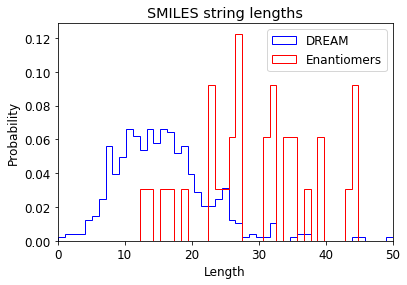

In [37]:
a.compare_smiles_lengths(dream_smiles,shadmany_smiles,['DREAM','Enantiomers']);

t=-3.964, p=8.42e-05


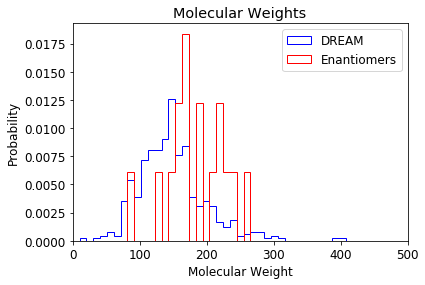

In [38]:
a.compare_molecular_weights(molecular_data_dream,molecular_data_shadmany,['DREAM','Enantiomers']);

In [26]:
predictions = a.make_predictions(rfs,X_shadmany,['Intensity'])

In [27]:
plus_pred = predictions.iloc[0::2]['Intensity'].values
minus_pred = predictions.iloc[1::2]['Intensity'].values

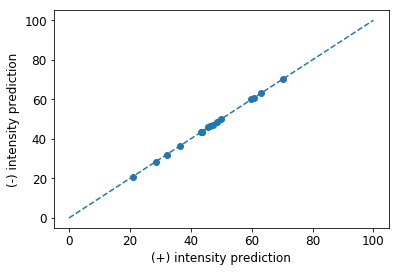

In [28]:
a.plt.scatter(plus_pred,minus_pred)
a.plt.plot([0,100],[0,100],'--')
a.plt.xlabel('(+) intensity prediction')
a.plt.ylabel('(-) intensity prediction')
a.plt.show()

In [29]:
plus_thresh = shadmany_data.iloc[0::2]['Normalized Detection Threshold'].values
minus_thresh = shadmany_data.iloc[1::2]['Normalized Detection Threshold'].values
plus_thresh = a.np.clip(plus_thresh,1e-8,1e8)
minus_thresh = a.np.clip(minus_thresh,1e-8,1e8)

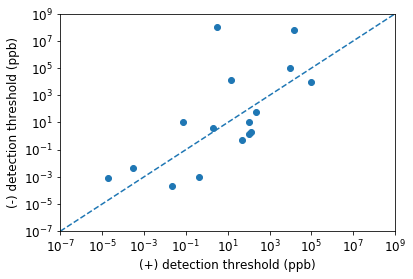

In [30]:
a.plt.scatter(plus_thresh,minus_thresh)
a.plt.plot([1e-7,1e9],[1e-7,1e9],'--')
a.plt.xlim(1e-7,1e9)
a.plt.ylim(1e-7,1e9)
a.plt.xscale('log')
a.plt.yscale('log')
a.plt.xlabel('(+) detection threshold (ppb)')
a.plt.ylabel('(-) detection threshold (ppb)')
a.plt.show()

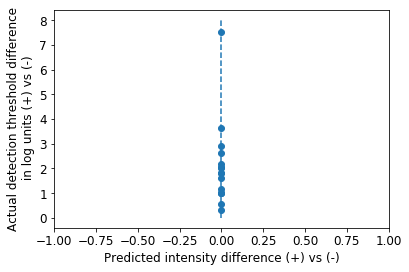

In [31]:
delta_pred = plus_pred - minus_pred
delta_thresh = a.np.log10(minus_thresh / plus_thresh)
inds = delta_thresh.argsort()
delta_pred = delta_pred[inds]
delta_thresh = delta_thresh[inds]
negative = delta_thresh < 0
delta_thresh[negative] *= -1
delta_pred[negative] *= -1
a.plt.scatter(delta_pred,delta_thresh)
a.plt.xlabel('Predicted intensity difference (+) vs (-)')
a.plt.ylabel('Actual detection threshold difference\n in log units (+) vs (-)')
a.plt.plot([0,0],[0,8],'--')
a.plt.xlim(-1,1)
a.plt.show()

In [32]:
print("Correlation coefficient R = %.3f" % a.np.corrcoef(delta_pred,delta_thresh)[0,1])

Correlation coefficient R = nan


/Users/rgerkin/Dropbox/miniconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/rgerkin/Dropbox/miniconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3163: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


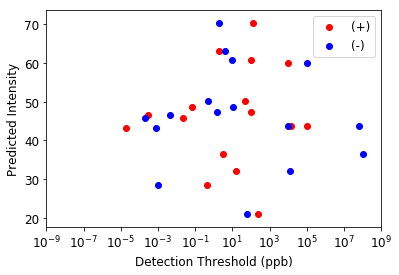

Correlation between predicted intensity and actual detection thresholds is R=-0.139


In [34]:
a.plt.scatter(plus_thresh,plus_pred,color='r',label='(+)')
a.plt.scatter(minus_thresh,minus_pred,color='b',label='(-)')
a.plt.xscale('log')
a.plt.xlim(1e-9,1e9)
a.plt.xlabel('Detection Threshold (ppb)')
a.plt.ylabel('Predicted Intensity')
a.plt.legend()
a.plt.show()
print("Correlation between predicted intensity and actual detection thresholds is R=%.3f" % \
      a.np.corrcoef(a.np.concatenate((plus_thresh,minus_thresh)),a.np.concatenate((plus_pred,minus_pred)))[0,1])